**This notebook contains the code blocks from *Chapter 2: Training Machine Learning Algorithms for Classification* in *Python Machine Learning* by Sebastian Raschka. See that chapter for more details.**

The first section deals with the perceptron, a simple model based on an idealized model of a neuron in the human brain. Read the chapter for more details.

*We start by creating our perceptron class.*

In [2]:
import numpy as np

In [3]:
class Perceptron (object):
    """Perceptron classifier.
    
    Parameters
    -------------
    
    eta : float
        Learning rate (between 0.0 and 1.0)

    n_iter : int
        Passes over the training dataset
        
    Attributes
    -------------
    
    w_ : 1d-array
        Weights after fitting.
        
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    
    def __init__ (self, eta=0.01, n_iter = 10):
        
        self.eta = eta
        self.n_iter = n_iter
        
    def fit (self, X, y):
        """Fit training data.
        
        Parameters
        ------------
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
            
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------------
        
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input (self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict (self, X):
        """Return class label after unit step"""
        return np.where(self.net_input (X) >= 0.0, 1, -1)

Now, we need a set of data to predict with our perceptron. We will use the classic Iris dataset for predicting Iris subspecies based on sepal length and petal length. 

*Note: We will only load the* **Setosa** *and* **Versicolor** *subspecies in because of the binary nature of our perceptron **It is possible to have a multiclass perceptron using the One vs All approach (see book).**

In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Data Cleansing Steps:
    
    1.) Extract the first 100 class labels so we're left with Iris-Versicolor and Iris-Setosa only.
    2.) Convert class labels to 1 (Versicolor) and -1 (Setosa) and assign to a vector y.
    3.) Extract first feature column (sepal length) and third feature column (petal length) and assign to feature matrix X.
    4.) Visualize in a 2D scatter plot.

In [5]:
import matplotlib.pyplot as plt

*Step 1*

In [6]:
y = df. iloc[0:100, 4].values

*Step 2*

In [7]:
y = np.where(y == 'Iris-setosa', -1, 1)

*Step 3*

In [8]:
X = df.iloc[0:100, [0,2]].values

*Step 4*

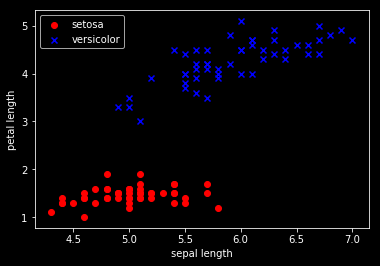

In [12]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.style.use('dark_background')
plt.show()

Now the fun part. We train our perceptron on this data set and plot the *misclassification error* to see if the algorithm converged.

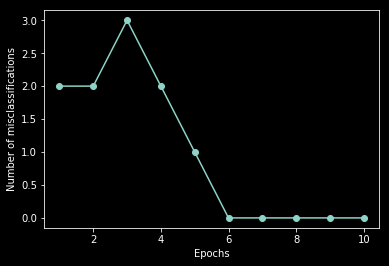

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.style.use('dark_background')
plt.show()

Our perceptron *converged*! It should classify the training data perfectly.

Now, Raschka implements a convenient function for visualizing the decision boundaries for 2D datasets.

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen','gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X [y == c1, 0], y=X [y == c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers [idx], label=c1)
    

This (complicated) function starts by defining and number of **colors** and **markers** to make a color map. We use the min and max values of our features to create a pair of grid arrays **xx1** and **xx2**. 

Then, we flatten the grid so that it has the same number of columns as the Iris training set and use our **classifier** to predict it.

Finally, we reshape the predicted class labels **z** and plot it using **contourf**

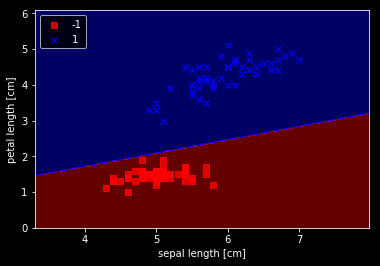

In [15]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel ('sepal length [cm]')
plt.ylabel ('petal length [cm]')
plt.legend (loc ='upper left')
plt.style.use('dark_background')
plt.show()

Now, we will implement a more sophisticated version of the perceptron, known as the ADAptive LInear NEuron, or Adaline for short. Instead of the activation function phi returning 1 or -1, instead it will return the linear combination of weights and measures fed into it. In this sense, it is the identity function of Z.

**Often in machine learning, optimization of an algorithm involves minimizing some cost function J.** For Adaline, our cost function is the sum of square errors between the calculated outcomes (predictions) and true class labels.

This is accomplished through the use of *gradient descent*, in which a function is minimized by taking small steps away from the gradient towards a local minimum.

All of this is further expounded in the book and implemented in the Adaline class below.

In [25]:
class AdalineGD (object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    -------------
    
    eta : float
        Learning rate (between 0.0 and 1.0)

    n_iter : int
        Passes over the training dataset
        
    Attributes
    -------------
    
    w_ : 1d-array
        Weights after fitting.
        
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    
    def __init__ (self, eta=0.01, n_iter = 10):
        
        self.eta = eta
        self.n_iter = n_iter
        
    def fit (self, X, y):
        """Fit training data.
        
        Parameters
        ------------
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
            
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------------
        
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input (self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation (self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict (self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

Now we will plot cost against number of epochs to check for convergence. We will do so using two different learning rates to get some intuition about the hyperparameter.

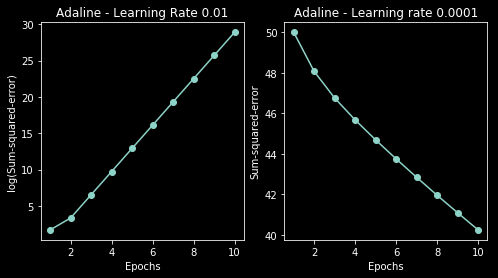

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD (n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ada2 = AdalineGD (n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.style.use('dark_background')
plt.show()



We see two different problems on display here. When the learning rate is too large, the error actually grows over time because gradient descent *overshoots* the global minimum (left). When the learning rate is too small, the algorithm will take a great number of calculations to converge (right).

Many machine learning algorithms benefit from the process of *standardization*, a method of feature scaling that involves giving data the property of the *standard normal distribution* (pg. 41 of Raschka for details).

Let's do this to our data.

In [22]:
X_std = np.copy(X)
X_std [:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std [:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

Let's train Adaline again with a learning rate of .01.

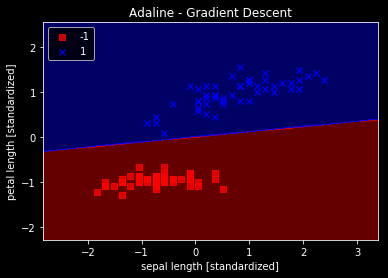

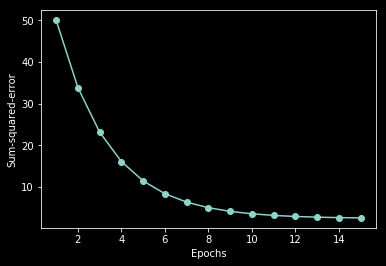

In [23]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.style.use('dark_background')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()


This sort of machine learning is great for small datasets. However, reevaluating the entire training set with each step towards the global minimum is very computationally expensive for large datasets.

An estimation of batch gradient descent is known as stochastic gradient descent. We update weights incrementally for each training sample.

This converges faster and escapes shallow local minima, but has a noisier error surface. But we can implement an adaptive learning rate and train the model on the fly for more efficient computations.

Again, we will modify our **fit** method. Additionally, we will implement a **partial_fit** method for use with online data (real-time training). Finally, we introduce **shuffle** to randomize the order in which samples are presented to our model. 

In [26]:
from numpy.random import seed

class AdalineSGD (object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    -------------
    
    eta : float
        Learning rate (between 0.0 and 1.0)

    n_iter : int
        Passes over the training dataset
        
    Attributes
    -------------
    
    w_ : 1d-array
        Weights after fitting.
        
    errors_ : list
        Number of misclassifications in every epoch.
        
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles.
        
    random_state : int (default: None)
        Set random state for shuffling
        and initializing the weights
        
    """
    
    def __init__ (self, eta=0.01, n_iter=10,
                  shuffle=True, random_state=None):
        
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit (self, X, y):
        """Fit training data.
        
        Parameters
        ------------
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
            
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------------
        
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)

        return self

    def partial_fit (self, X, y):
        """Fit training date without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeroes"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
        
    def net_input (self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation (self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict (self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

The numpy.random function call shuffles the indices of our feature matrix and class label vector.

*Note: much of how this works is obscured to me. Revisit after learning more about numpy.*

Let's train this new model to our data and plot our decision boundary and error vs epoch charts.

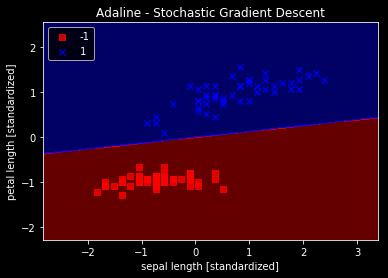

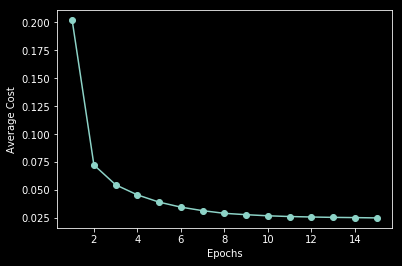

In [28]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.style.use('dark_background')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

It seems that the average cost decreases fairly quickly AND our decision boundary is very reminiscent of the boundary obtained from batch gradient descent.

Thus, usage of stochastic gradient descent as a replacement for batch GD when dealing with large datasets or online data seems to be valid. It's important to note that stochastic GD is an *approximation* and will never reach the exact global minimum.

**SUMMARY**

This chapter dove into using linear classifiers for supervised learning through implementation of a perceptron, and eventually Adalines optimized using gradient descent.